In [4]:
from vision import dataloaders
from vision.utils import Helper
from vision.models.resnet import ResNet18
from vision.imagetransforms import TorchTransforms,  album_transforms
import torch
from torchvision import  transforms
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from vision.train_test_model import RunModel
from vision.lr_finder import LRFinder
from torch.optim.lr_scheduler import ReduceLROnPlateau
from vision import plot_grad
from vision import train_test_model

  pip install torch-lr-finder -v --global-option="amp"


In [0]:
helper = Helper()

In [6]:
mean, std = helper.get_mean_and_std('cifar10')

Files already downloaded and verified


In [0]:
test_transforms = [ transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                  ]

In [0]:
torch_transforms = TorchTransforms(test_transforms)

In [9]:
aub = album_transforms()

Files already downloaded and verified


In [0]:
train_transforms = aub
test_transforms = torch_transforms.testTransform()
loader = dataloaders.Loader(train_transforms, test_transforms, 'cifar10')

In [11]:
train_dataloader  = loader.dataloader_train()
test_dataloader = loader.dataloader_test()
gradcam_dataloader = loader.dataloader_gradcam()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [0]:
Net = ResNet18()

In [27]:
size =  (3, 32, 32)
helper.model_summary(Net, size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


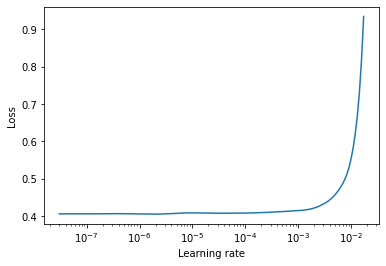

In [29]:
L2 = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=1e-8,momentum=0.9, weight_decay=L2)#, nesterov=True)
lr_finder = LRFinder(Net, optimizer, criterion, device="cuda")
lr_finder.range_test(train_dataloader, val_loader=test_dataloader, end_lr=1, num_iter=200, step_mode="exp")
lr_finder.plot() 
lr_finder.reset()

In [0]:
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
Best_lr=lr[loss.index(min(loss))]


In [0]:
epochs = 2
L1 = 0
L2 = 0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=1e-1,momentum=0.9, weight_decay=L2)#, nesterov=True)
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, patience = 2,min_lr=1e-5)

Modified

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [21]:
test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
losses = []
accuracies = []

epochs = 50
for epoch in range(1, epochs + 1):
    # for param_group in optimizer.param_groups:
    #   print("lr= ",param_group['lr'])
    print(f'Epoch {epoch}:')
    trainacc, loss = train_test_model.train(Net, train_dataloader, device, optimizer, criterion)
    train_acc.append(trainacc)
    testacc, loss1 = train_test_model.val(Net, test_dataloader, device, criterion, losses, accuracies)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step(loss1)
print('Finished Training')

Epoch 1:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0512, Accuracy: 3870/10000 (38.70%)

Epoch 2:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0419, Accuracy: 5121/10000 (51.21%)

Epoch 3:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0358, Accuracy: 5894/10000 (58.94%)

Epoch 4:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0325, Accuracy: 6331/10000 (63.31%)

Epoch 5:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0268, Accuracy: 7006/10000 (70.06%)

Epoch 6:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0220, Accuracy: 7515/10000 (75.15%)

Epoch 7:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0206, Accuracy: 7681/10000 (76.81%)

Epoch 8:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0205, Accuracy: 7822/10000 (78.22%)

Epoch 9:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0185, Accuracy: 7965/10000 (79.65%)

Epoch 10:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0199, Accuracy: 7899/10000 (78.99%)

Epoch 11:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0170, Accuracy: 8140/10000 (81.40%)

Epoch 12:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0183, Accuracy: 8007/10000 (80.07%)

Epoch 13:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0172, Accuracy: 8173/10000 (81.73%)

Epoch 14:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0179, Accuracy: 8173/10000 (81.73%)

Epoch 15:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0122, Accuracy: 8724/10000 (87.24%)

Epoch 16:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0125, Accuracy: 8748/10000 (87.48%)

Epoch 17:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0125, Accuracy: 8769/10000 (87.69%)

Epoch 18:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0129, Accuracy: 8781/10000 (87.81%)

Epoch 19:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0126, Accuracy: 8810/10000 (88.10%)

Epoch 20:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0127, Accuracy: 8807/10000 (88.07%)

Epoch 21:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0128, Accuracy: 8809/10000 (88.09%)

Epoch 22:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0127, Accuracy: 8816/10000 (88.16%)

Epoch 23:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0128, Accuracy: 8822/10000 (88.22%)

Epoch 24:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0128, Accuracy: 8825/10000 (88.25%)

Epoch 25:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0127, Accuracy: 8820/10000 (88.20%)

Epoch 26:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0127, Accuracy: 8818/10000 (88.18%)

Epoch 27:
---------


  0%|          | 0/1563 [00:00<?, ?it/s]

Testing: Average loss: 0.0128, Accuracy: 8822/10000 (88.22%)

Epoch 28:
---------


Loss=0.10 Accuracy=97.90:  30%|███       | 472/1563 [00:19<00:44, 24.27it/s]

Buffered data was truncated after reaching the output size limit.

In [31]:
train_acc[-1], test_acc[-1], len(train_acc), len(test_acc)

(98.336, 88.25, 50, 50)

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

<Figure size 1008x1152 with 0 Axes>

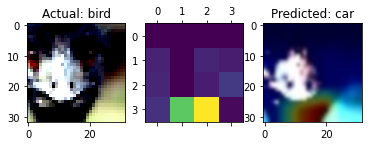

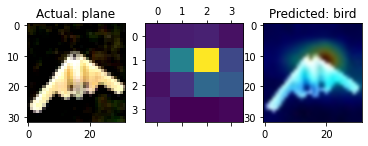

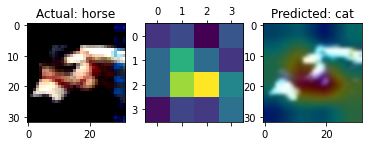

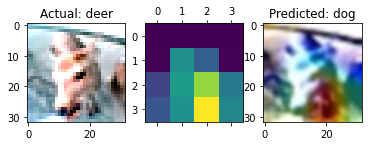

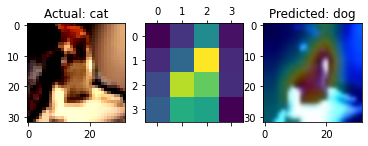

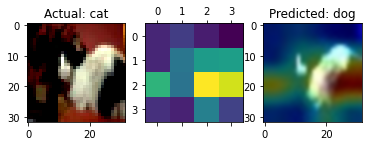

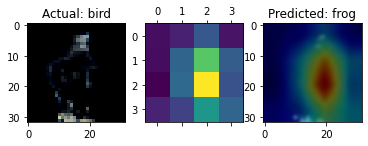

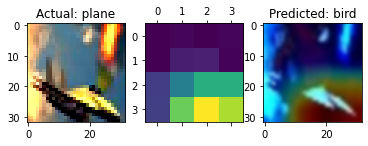

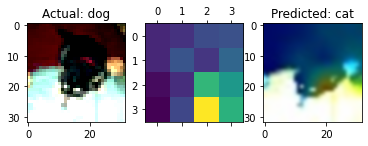

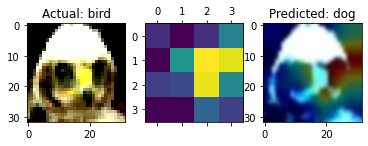

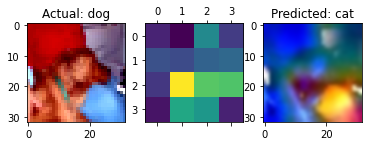

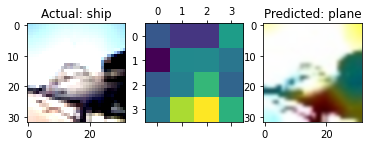

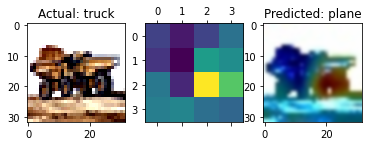

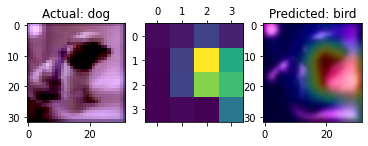

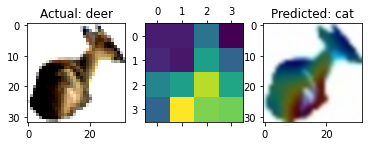

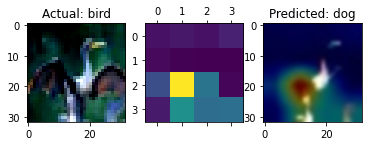

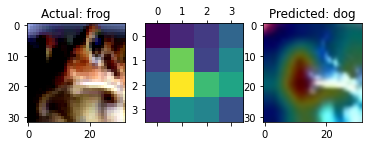

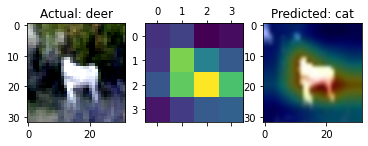

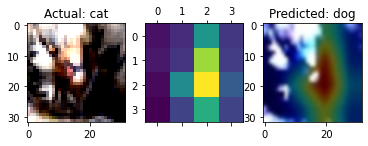

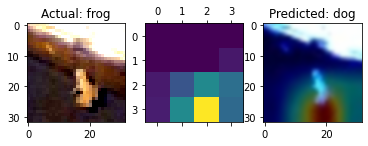

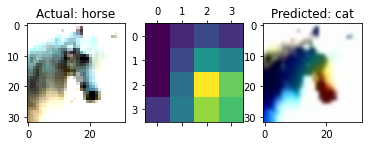

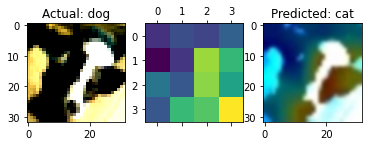

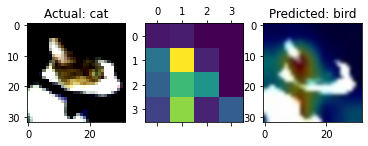

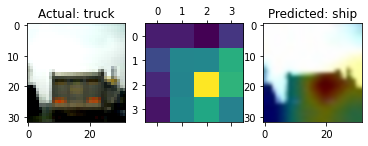

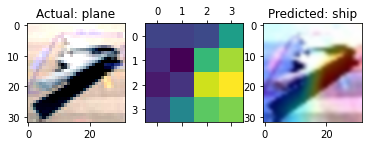

In [32]:
import warnings
warnings.simplefilter('ignore')
it = iter(gradcam_dataloader)
fig=plt.figure(figsize=(14, 16))
count = 0
while(count != 25):
    images, labels = it.next()
    output = Net(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    if(classes[pred] != classes[labels]):
      plot_grad.get_gradcam(Net, images, classes, str(classes[labels]), str(classes[pred]))
      count=count+1

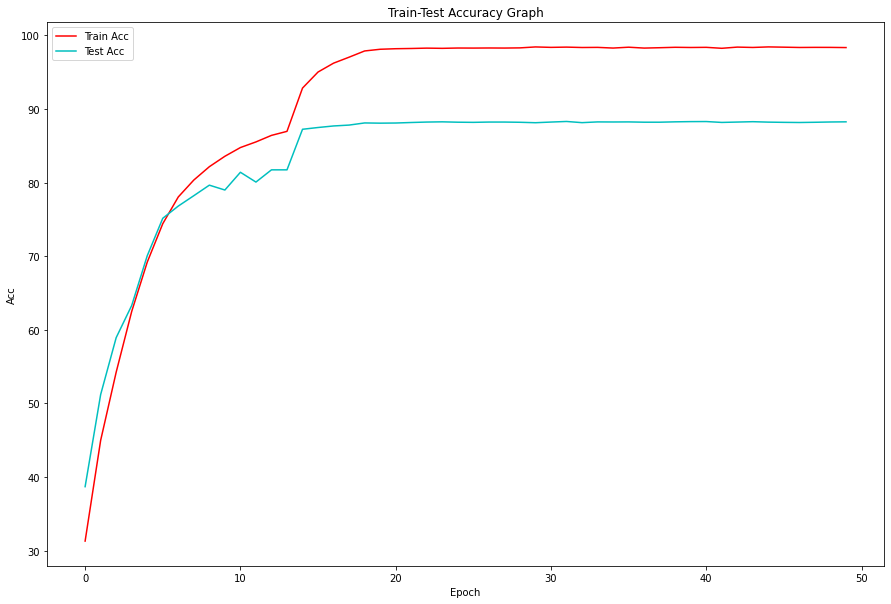

In [24]:
helper.plot_acc_graph(train_acc, test_acc, epochs)

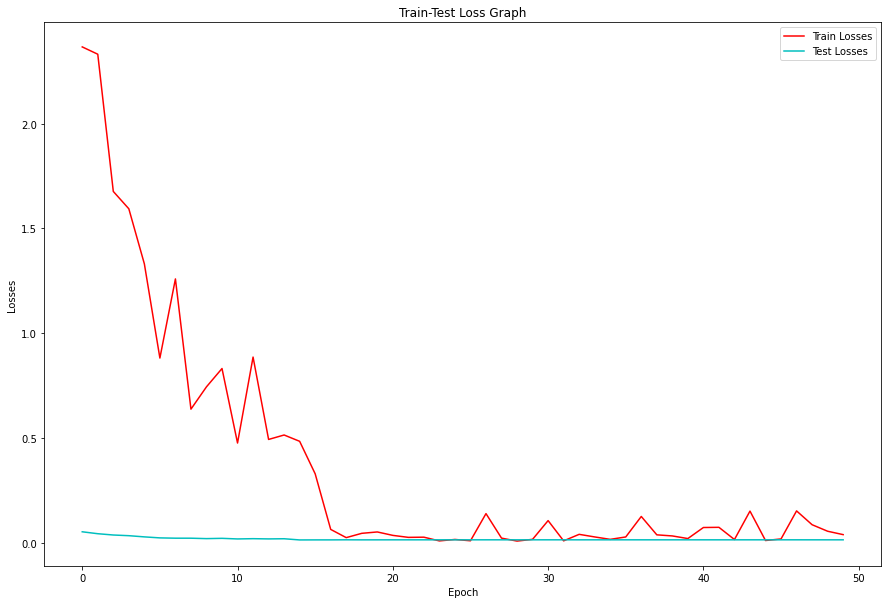

In [25]:
helper.plot_loss_graph(trainloss_, testloss_, epochs)